In [1]:
from sage.config import *
from sage.data.dataloader import *
from utils.misc import seed_everything

In [2]:
cfg = load_config()
seed_everything(cfg.seed)
cfg.registration = 'mni'
cfg.unused_src = []

cfg.unlearn = True
cfg.unlearn_cfg.domainer.num_dbs = 4 - len(cfg.unused_src)

In [8]:
# (encoder, regressor, domainer), cfg.device = load_unlearn_models(cfg.unlearn_cfg)
train_dataloader = get_dataloader(cfg, test=False)
valid_dataloader = get_dataloader(cfg, test=True)

In [89]:
trn_ds = train_dataloader.dataset
val_ds = valid_dataloader.dataset

In [96]:
trn_srcidx = trn_ds.data_src
trn_age = trn_ds.data_ages
val_srcidx = val_ds.data_src
val_age = val_ds.data_ages

In [92]:
trn_map = trn_ds.src_map
val_map = val_ds.src_map

In [94]:
trn_map == val_map

True

In [98]:
idx2dom = {v: k for k, v in trn_map.items()}

trn_src = list(map(lambda x: idx2dom[x], trn_srcidx))
val_src = list(map(lambda x: idx2dom[x], val_srcidx))

In [107]:
dist = pd.DataFrame({
    'Age'  : trn_age + val_age,
    'Domain': trn_src + val_src,
    'Phase' : ['Train'] * len(trn_age) + ['Valid'] * len(val_age)
})

<AxesSubplot:title={'center':'Age Histogram with Domains'}, xlabel='Age', ylabel='Count'>

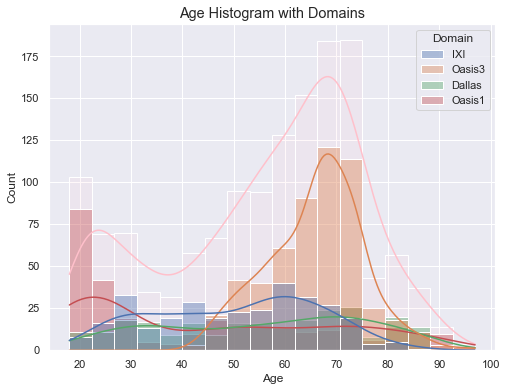

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Age Histogram with Domains', size='large')
sns.histplot(data=dist, x='Age', alpha=.1, ax=ax, kde=True, color='pink')
sns.histplot(data=dist, x='Age', hue='Domain', alpha=.4, ax=ax, kde=True)

<AxesSubplot:title={'center':'Age Histogram with Domains'}, xlabel='Domain', ylabel='Count'>

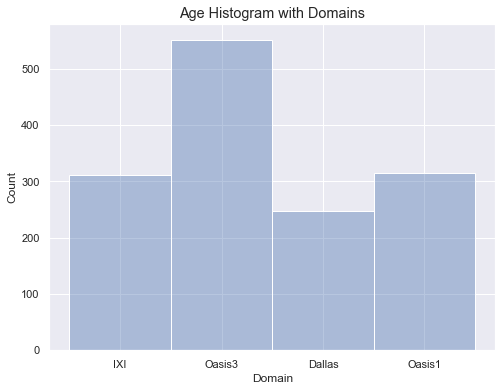

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Domain Histogram with Domains', size='large')
sns.histplot(data=dist, x='Domain', alpha=.4, ax=ax)

<AxesSubplot:title={'center':'Age Histogram with Domains'}, xlabel='Domain', ylabel='Probability'>

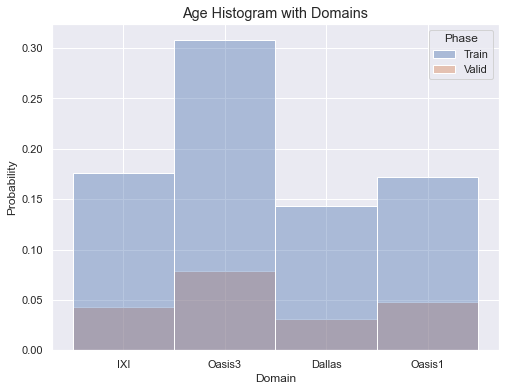

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Age Histogram with Domains', size='large')
sns.histplot(data=dist, x='Domain', hue='Phase', alpha=.4, ax=ax, stat='probability')

<AxesSubplot:title={'center':'Age Histogram with Domains'}, xlabel='Age', ylabel='Count'>

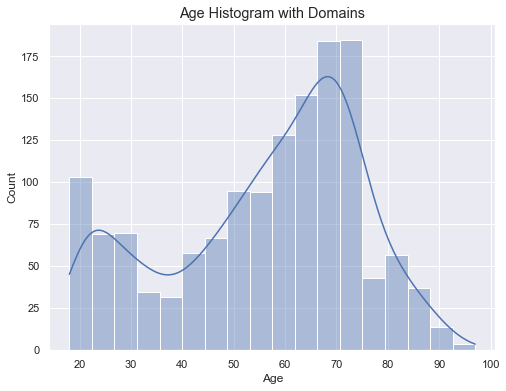

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Overall Age Histogram', size='large')
sns.histplot(data=dist, x='Age', alpha=.4, ax=ax, kde=True)

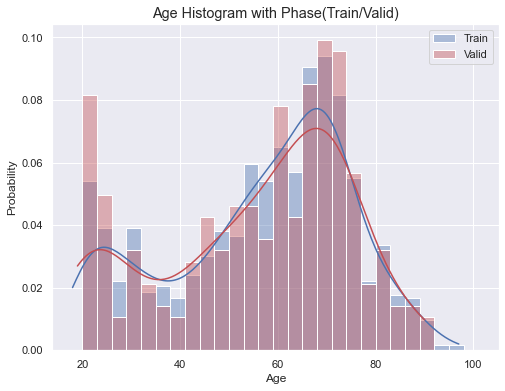

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Age Histogram with Phase(Train/Valid)', size='large')
sns.histplot(data=dist[dist['Phase'] == 'Train'], x='Age', alpha=.4, binrange=(20, 100), binwidth=3,
             ax=ax, kde=True, stat='probability', color='b', label='Train')
sns.histplot(data=dist[dist['Phase'] == 'Valid'], x='Age', alpha=.4, binrange=(20, 100), binwidth=3,
             ax=ax, kde=True, stat='probability', color='r', label='Valid')
ax.legend()

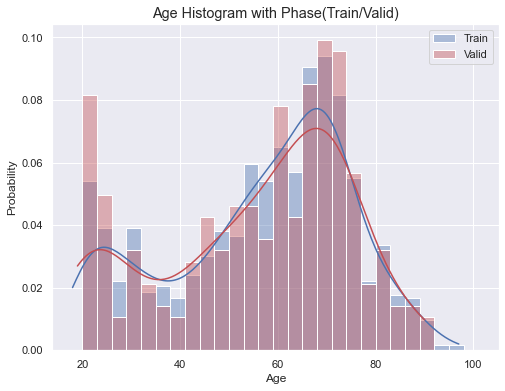

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Age Histogram with Phase(Train/Valid)', size='large')
sns.histplot(data=dist[dist['Phase'] == 'Train'], x='Domain', alpha=.4,
             ax=ax, kde=True, stat='probability', color='b', label='Train')
sns.histplot(data=dist[dist['Phase'] == 'Valid'], x='Domain', alpha=.4,
             ax=ax, kde=True, stat='probability', color='r', label='Valid')
ax.legend()

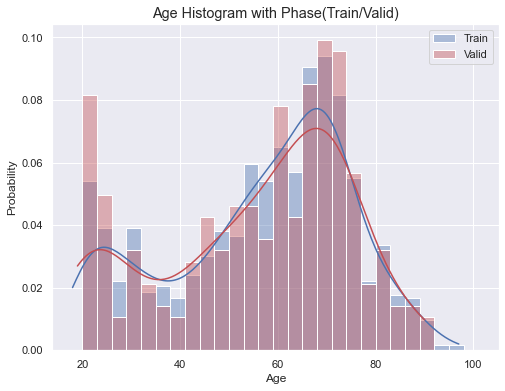

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Age Histogram with Phase(Train/Valid)', size='large')
sns.histplot(data=dist[dist['Phase'] == 'Train'], x='Age', alpha=.4, binrange=(20, 100), binwidth=3,
             ax=ax, kde=True, stat='probability', color='b', label='Train')
sns.histplot(data=dist[dist['Phase'] == 'Valid'], x='Age', alpha=.4, binrange=(20, 100), binwidth=3,
             ax=ax, kde=True, stat='probability', color='r', label='Valid')
ax.legend()

<AxesSubplot:xlabel='Age', ylabel='Density'>

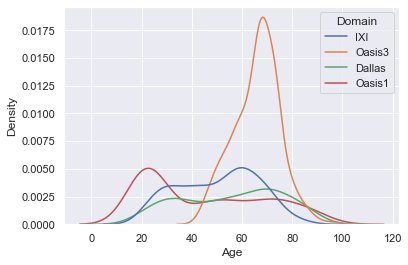

In [115]:
sns.kdeplot(data=dist, x='Age', hue='Domain')

## Save auxiliary npy data for Unlearning git from NKDinsdale

In [1]:
PATH = '../Unlearning_for_MRI_harmonisation/'

# WIDTH, HEIGHT, DEPTH, CHANNEL
SHAPE = (128, 128, 64, 1)

In [2]:
# N_BBANK = 5508 + 1377
# N_OASIS = 813 + 217
# N_WHITE = 452 + 51

In [3]:
N_BBANK = 90
N_OASIS = 90
N_WHITE = 90

In [12]:
N_BBANK, N_OASIS, N_WHITE = map(lambda x: x // 20, [N_BBANK, N_OASIS, N_WHITE])

In [13]:
N_BBANK, N_OASIS, N_WHITE

(9, 9, 9)

In [6]:
import numpy as np

In [4]:
file_meta = {
    'BIOBANK': (N_BBANK, 'X_train.npy', 'y_train.npy'),
    'OASIS'  : (N_OASIS, 'oasis_X_train.npy', 'oasis_y_train.npy'),
    'WHITEHALL': (N_WHITE, 'X_train_whitehall1.npy', 'y_train_whitehall1.npy')
}

In [7]:
for domain in file_meta:
    size, X_name, y_name = file_meta[domain]
    np.save(f'{PATH}/{X_name}', (np.random.rand(*(size,) + SHAPE) - 0.5) * 2)
    np.save(f'{PATH}/{y_name}', np.random.randint(low=20, high=80, size=size))